<a href="https://colab.research.google.com/github/lokeshreddyayyaswamy/Agri_Horticulture_Crop_Price_Prediction/blob/main/Crop_Price_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Cleaned_Dataset.csv')
df.head()

,Unnamed: 0,Date,Centre_Name,Commodity_Name,Season,Price
0,0,26-08-2008,DELHI,Soya Oil (Packed),Kharif,69.0
1,1,29-08-2008,DELHI,Soya Oil (Packed),Kharif,69.0
2,2,23-09-2008,DELHI,Soya Oil (Packed),Kharif,69.0
3,3,24-09-2008,DELHI,Soya Oil (Packed),Kharif,69.0
4,4,25-09-2008,DELHI,Soya Oil (Packed),Kharif,69.0


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
#converting the date format
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

<ipython-input-4-fa9f2671cc4d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'],errors='coerce')


In [ ]:
# sepearte the date column into year
df['Year']=df['Date'].dt.year

In [ ]:
#drop date because we added year
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Centre_Name,Commodity_Name,Season,Price,Year
0,DELHI,Soya Oil (Packed),Kharif,69.0,2008
1,DELHI,Soya Oil (Packed),Kharif,69.0,2008
2,DELHI,Soya Oil (Packed),Kharif,69.0,2008
3,DELHI,Soya Oil (Packed),Kharif,69.0,2008
4,DELHI,Soya Oil (Packed),Kharif,69.0,2008


In [ ]:
#Transforming the data
#converting the years from rows to columns based on centre name,commodity and price with yearly average
pivot_df = df.pivot_table(index=['Centre_Name', 'Commodity_Name'],
                          columns='Year', values='Price',aggfunc='mean').reset_index()

In [ ]:
pivot_df.tail(50)

Year,Centre_Name,Commodity_Name,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1091,TIRUNELVELI,Onion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.416667,22.253333
1092,TIRUNELVELI,Palm Oil (Packed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.117647,63.053333
1093,TIRUNELVELI,Sunflower Oil (Packed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.058824,88.000000
1094,TIRUNELVELI,Tomato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.476190,13.453333
1095,TIRUNELVELI,Urad Dal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.571429,88.840000
1096,VARANASI,Masoor Dal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,42.123457,39.649038,44.446429,52.805430,59.708738,65.986301
1097,VARANASI,Moong Dal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.703704,65.028846,70.580357,80.000000,85.485437,101.369863
1098,VARANASI,Onion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.370370,17.511737,11.825893,33.723982,23.864734,25.986301
1099,VARANASI,Tomato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.972826,19.214286,28.457014,28.599034,21.506849
1100,VARANASI,Urad Dal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.259259,57.403846,59.455357,65.000000,65.000000,65.821918


In [ ]:
#displaying null values
print(pivot_df.isnull().sum())

Year
Centre_Name         0
Commodity_Name      0
1993              742
1994              725
1995              729
1996              721
1997              708
1998              715
1999              709
2000              707
2001              713
2002              733
2003              658
2004              658
2005              658
2006              629
2007              601
2008              522
2009              468
2010              293
2011              325
2012              270
2013              675
2014              606
2015              642
dtype: int64


In [ ]:
df2=pd.read_csv('/content/Yearwise_Commoditywise_Mean_Final.csv')
df2.head()

,Year,ATTA,Brinjal,Cabbage,Masoor Dal,Moong Dal,Mustard Oil,Onion,Palm Oil (Packed),Rice,...,Urad Dal,Vanaspati,Wheat,gram_dal,groundnut_oil,gur,milk,potato,salt,sugar
0,1993,6.292407,6.682930,6.225856,13.218499,19.212073,30.167154,7.970767,16.296491,6.700499,...,24.675238,35.855970,4.970379,14.230143,34.887553,10.359831,7.144199,3.982273,3.177759,11.387695
1,1994,7.011038,7.446162,6.936887,14.728132,21.406209,33.673309,8.881078,18.157650,7.591729,...,27.176105,39.685294,5.721259,17.572787,39.681594,11.336159,7.960110,4.239468,3.522603,14.261784
2,1995,7.083431,8.293787,7.726539,16.404692,23.842960,37.894547,9.892044,20.224605,8.137220,...,27.176105,42.947420,5.764099,13.847782,44.592308,10.786721,8.866240,5.541856,4.089979,13.544966
3,1996,7.782280,9.112049,8.488837,18.023172,26.195297,37.379213,10.867990,22.219957,9.009758,...,29.857290,40.446498,7.018641,14.436362,44.742071,10.792493,9.740980,6.392224,4.636257,14.395668
4,1997,8.382464,9.814788,9.143513,19.413154,28.215529,36.650761,11.706150,23.933603,9.389481,...,32.159942,39.153652,7.985948,18.864973,44.465532,13.019683,10.492223,5.215350,5.410085,15.210582


In [ ]:
# Assuming is your DataFrame
df2.set_index('Year', inplace=True)
transposed_df = df2.transpose()

# Reset index if you want 'Commodity' as a column instead of the index
transposed_df.reset_index(inplace=True)

In [ ]:
pivot_df.set_index(['Centre_Name', 'Commodity_Name'], inplace=True)
transposed_df.set_index('index', inplace=True)

In [ ]:
# Fill NaN values in pivot_df using values from transposed_df
for row in pivot_df.index:
    if row[1] in transposed_df.index:
        # Get the year columns from transposed_df
        transposed_values = transposed_df.loc[row[1]]
        # Update pivot_df with the corresponding values from transposed_df
        pivot_df.loc[row] = pivot_df.loc[row].fillna(pd.Series(transposed_values, index=pivot_df.columns))

# Reset index if needed
pivot_df.reset_index(inplace=True)

In [ ]:
#final dataset with null filled
pivot_df

Year,Centre_Name,Commodity_Name,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AGARTALA,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,12.817308,15.622642,16.424528,16.384615,19.333333,19.478261,20.052632,19.406213,21.350715,22.774808
1,AGARTALA,Brinjal,6.682930,7.446162,8.293787,9.112049,9.814788,11.311268,13.035921,13.580499,...,17.664784,18.866586,18.000000,19.151020,20.000000,16.674924,17.983714,22.868878,19.182390,20.461855
2,AGARTALA,Cabbage,6.225856,6.936887,7.726539,8.488837,9.143513,10.537643,11.053858,11.526442,...,14.992977,16.013006,17.471910,20.000000,20.000000,13.577761,16.050429,19.720873,15.538947,16.575395
3,AGARTALA,Masoor Dal,13.218499,14.728132,16.404692,18.023172,19.413154,22.373118,23.469126,24.449553,...,31.802667,34.189143,48.418933,67.955556,58.480176,50.418269,62.917722,70.966825,75.214286,75.000000
4,AGARTALA,Moong Dal,19.212073,21.406209,23.842960,26.195297,28.215529,32.517609,34.110573,35.535548,...,47.218830,42.785917,42.000000,49.216327,69.072222,64.668269,62.556962,70.662791,71.333333,73.471429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,WAYANAD,Onion,7.970767,8.881078,9.892044,10.867990,11.706150,16.281993,8.303919,6.682750,...,8.158070,13.696950,10.764047,15.332729,19.814938,17.824437,14.249007,33.327434,23.170326,41.253968
1137,WAYANAD,Palm Oil (Packed),16.296491,18.157650,20.224605,22.219957,23.933603,27.582808,28.934027,30.142752,...,39.208074,41.875546,45.690722,46.046226,51.241010,64.124295,70.616698,68.185153,69.511892,67.000000
1138,WAYANAD,Sunflower Oil (Packed),25.845432,28.797139,32.075227,35.239758,37.957516,43.744976,45.887943,47.804920,...,62.182075,66.412555,72.463235,66.973877,67.041623,84.212520,92.117655,97.622782,94.786625,90.000000
1139,WAYANAD,Tomato,3.737263,4.164082,4.638095,5.095688,5.488677,6.325547,6.635421,6.919105,...,9.000000,9.125000,27.430723,17.780379,20.187050,18.139296,20.084685,27.504689,25.750572,23.873016


In [ ]:
pivot_df.to_csv('SIH_FINAL_DATA_SET_1647_YEARLY.csv')

In [ ]:
# Grouping the dataset by 'Commodity_Name' to arrange it crop-wise
df_grouped = pivot_df.groupby('Commodity_Name').apply(lambda x: x.sort_values(['Centre_Name'])).reset_index(drop=True)

# Displaying the grouped DataFrame
df_grouped

Year,Centre_Name,Commodity_Name,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AGARTALA,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,12.817308,15.622642,16.424528,16.384615,19.333333,19.478261,20.052632,19.406213,21.350715,22.774808
1,AHMEDABAD,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,11.586538,13.548077,13.716981,14.134615,16.648148,14.962264,15.962963,19.406213,21.350715,22.774808
2,AIZAWL,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,14.000000,14.865385,14.698113,14.000000,14.333333,16.156250,17.000000,19.406213,21.350715,22.774808
3,AMRITSAR,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,11.067308,12.221154,13.000000,13.519231,14.840000,13.666667,15.521739,19.406213,21.350715,22.774808
4,BANGALORE,ATTA,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,9.283253,...,13.884615,16.615385,17.127273,18.288462,19.509804,19.440000,19.000000,19.406213,21.350715,22.774808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,SHILLONG,sugar,12.214286,15.250000,15.000000,15.346939,16.318182,17.401961,17.552083,17.950980,...,21.759615,18.000000,20.532075,28.961538,33.224490,34.223404,35.291667,36.528906,40.189102,42.869715
1137,SHIMLA,sugar,12.079808,15.079787,14.495000,14.956731,15.838679,16.645192,17.012745,17.341346,...,22.087115,17.500000,19.398148,29.384615,34.314815,34.545455,35.285714,36.528906,40.189102,42.869715
1138,SRINAGAR,sugar,11.387695,16.111111,15.500000,15.000000,15.210582,15.933868,19.388889,19.941176,...,20.683008,16.472712,22.000000,22.000000,32.673077,34.408163,33.615385,36.528906,40.189102,42.869715
1139,THIRUVANANTHAPURAM,sugar,11.605128,14.004444,12.596000,14.234783,15.430556,15.800000,15.596078,16.024490,...,20.245192,16.115385,18.772727,26.980769,31.943148,32.210000,31.846154,36.528906,40.189102,42.869715


In [ ]:
# Convert wide data to long format
df_long = df_grouped.melt(id_vars=['Centre_Name', 'Commodity_Name'], var_name='Year', value_name='Price')

In [ ]:
df_long

,Centre_Name,Commodity_Name,Year,Price
0,AGARTALA,ATTA,1993,6.292407
1,AHMEDABAD,ATTA,1993,6.292407
2,AIZAWL,ATTA,1993,6.292407
3,AMRITSAR,ATTA,1993,6.292407
4,BANGALORE,ATTA,1993,6.292407
...,...,...,...,...
26238,SHILLONG,sugar,2015,42.869715
26239,SHIMLA,sugar,2015,42.869715
26240,SRINAGAR,sugar,2015,42.869715
26241,THIRUVANANTHAPURAM,sugar,2015,42.869715


In [ ]:
# Convert 'Year' to numeric for proper plotting
df_long['Year'] = pd.to_numeric(df_long['Year'])

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

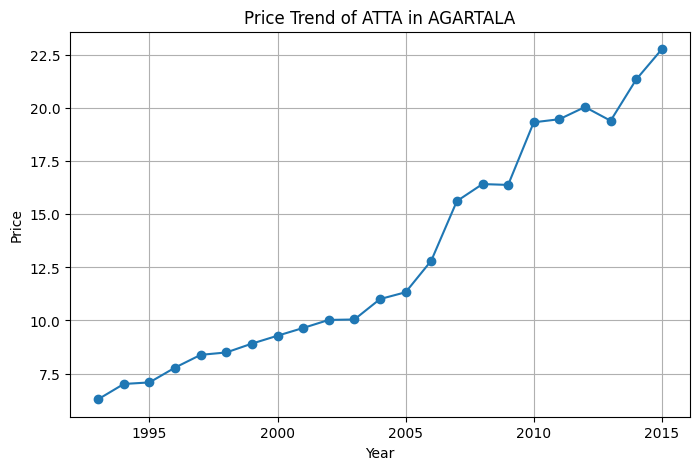

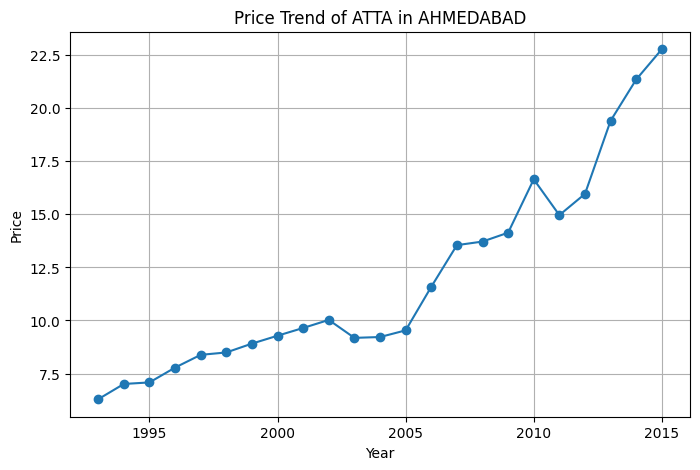

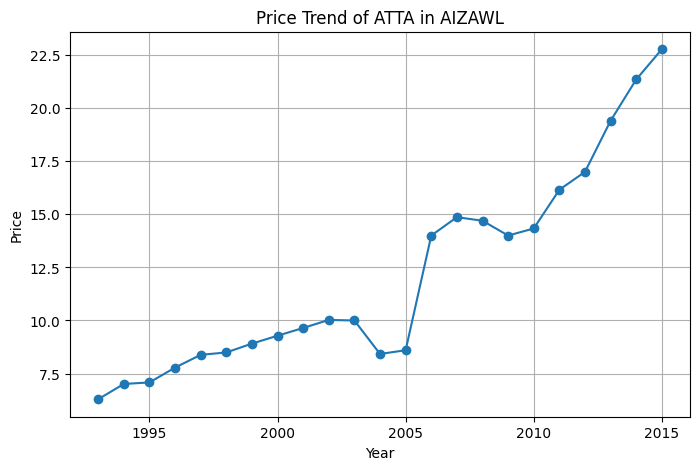

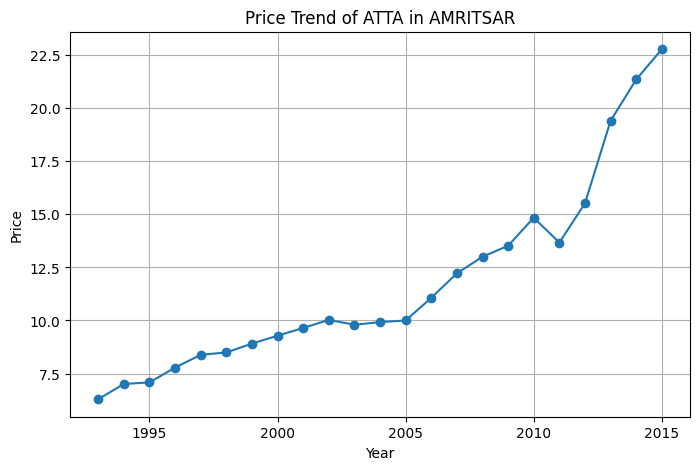

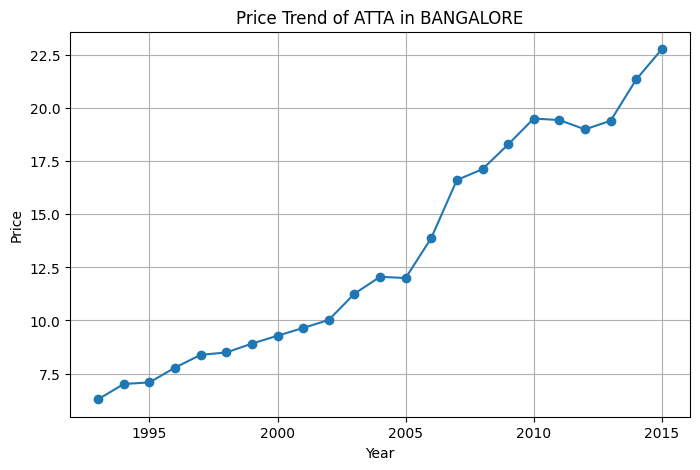

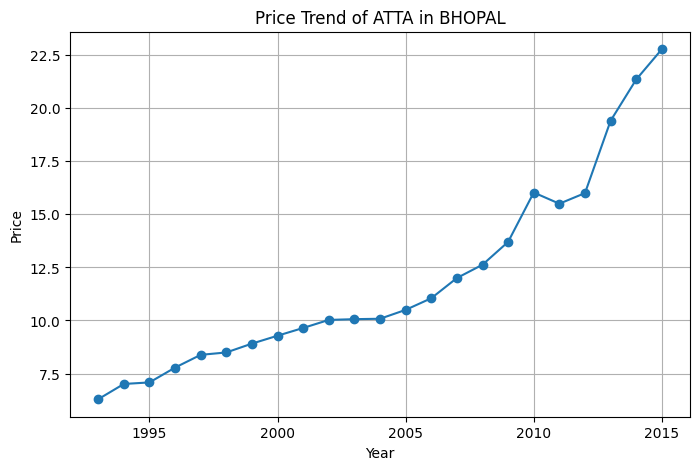

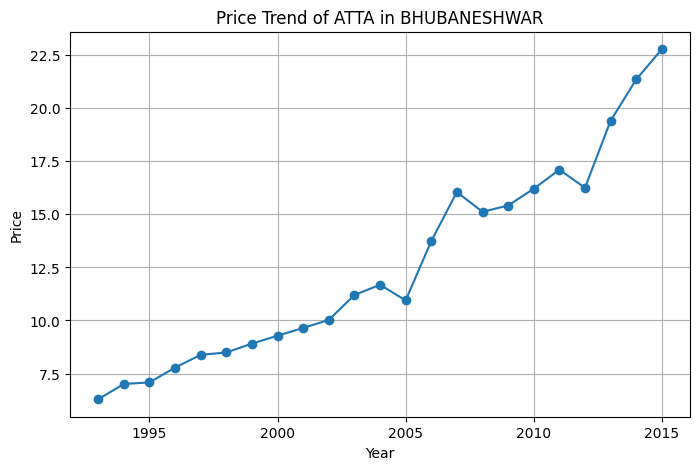

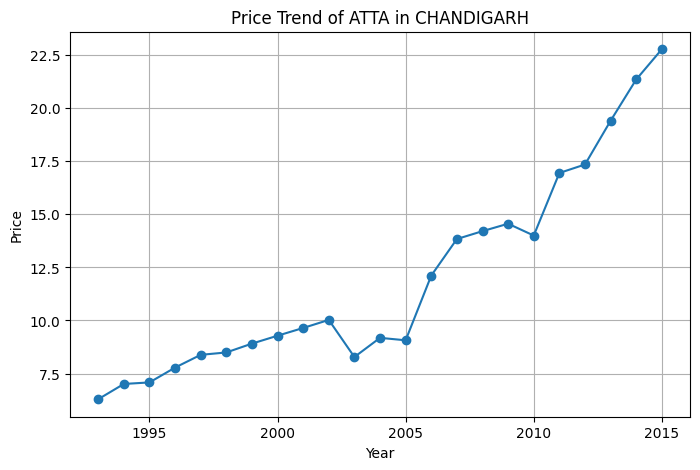

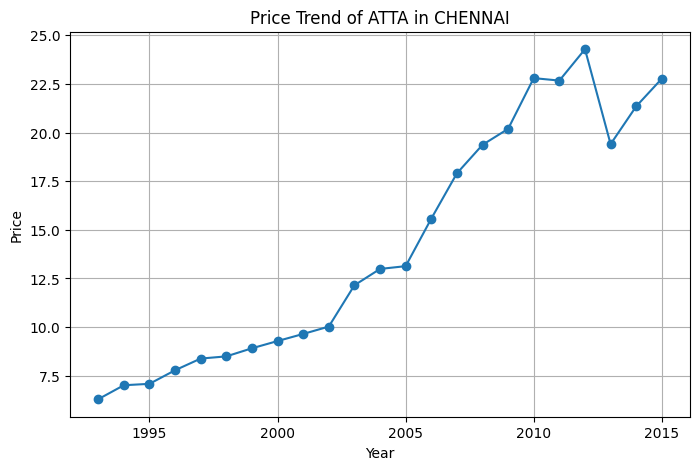

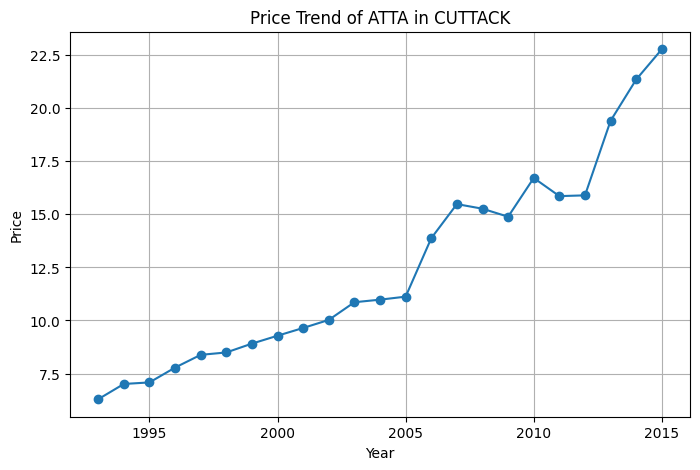

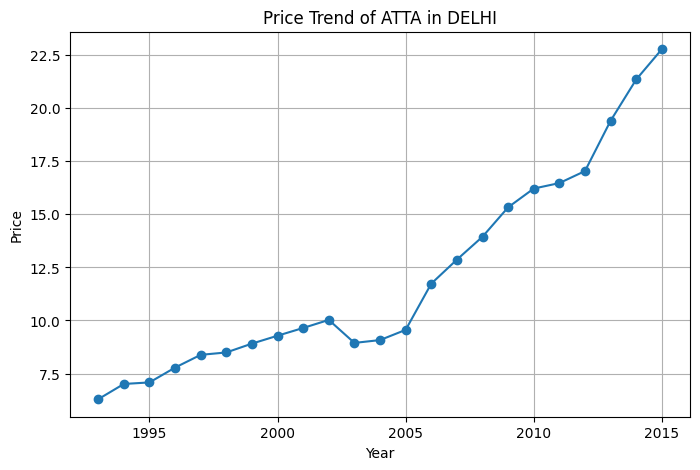

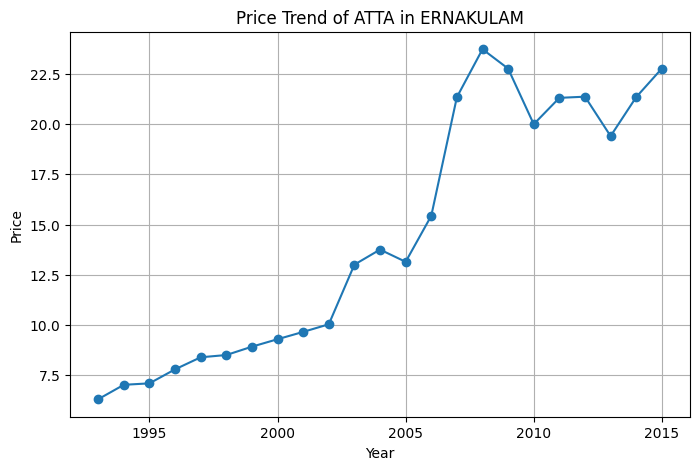

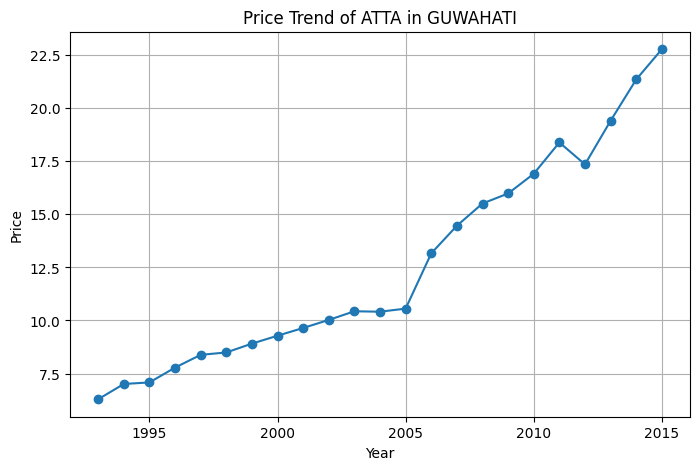

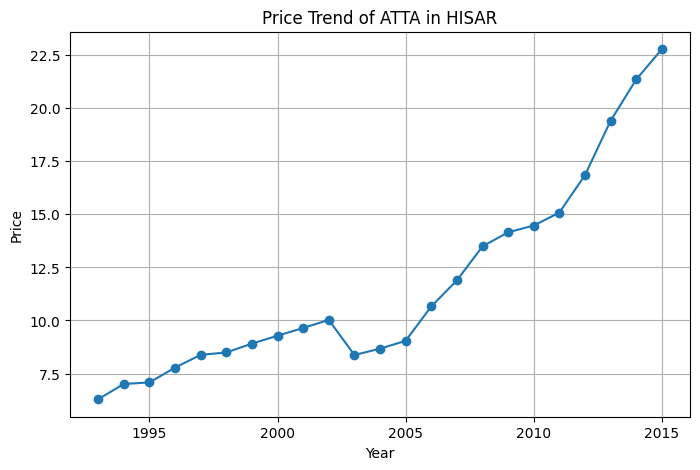

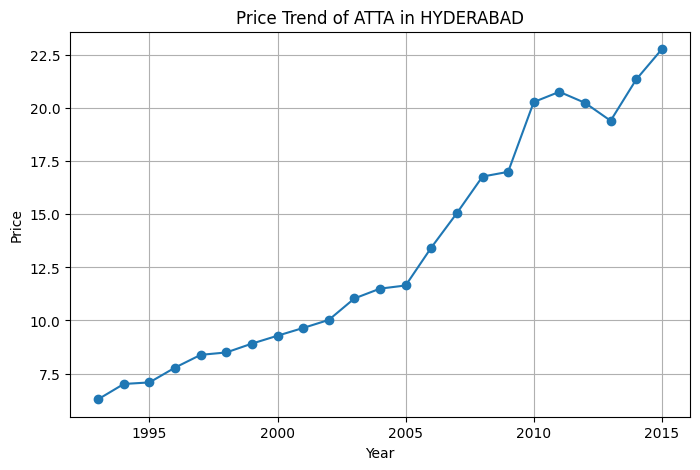

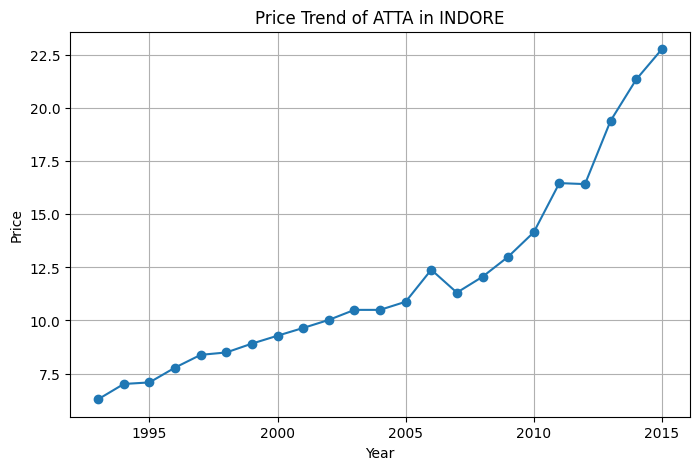

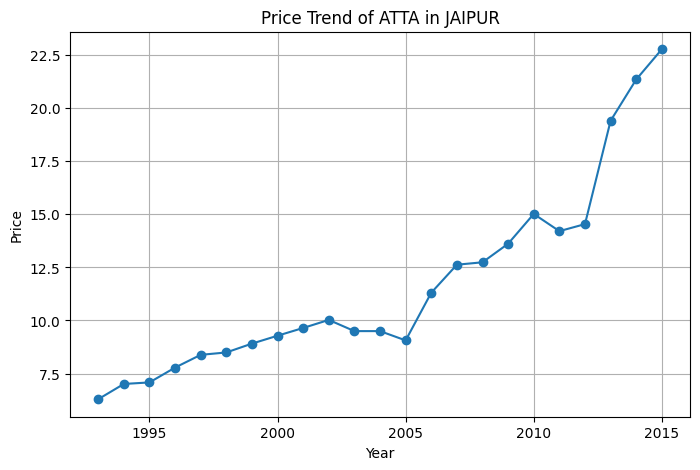

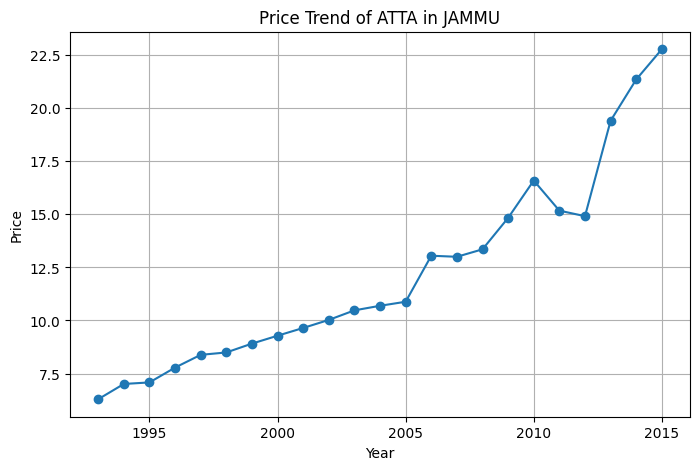

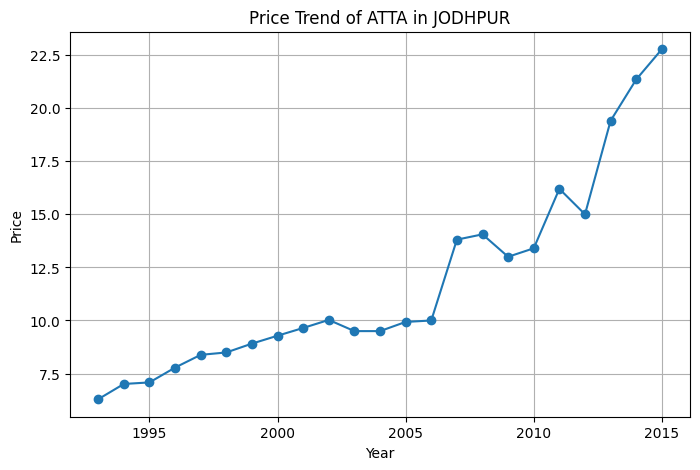

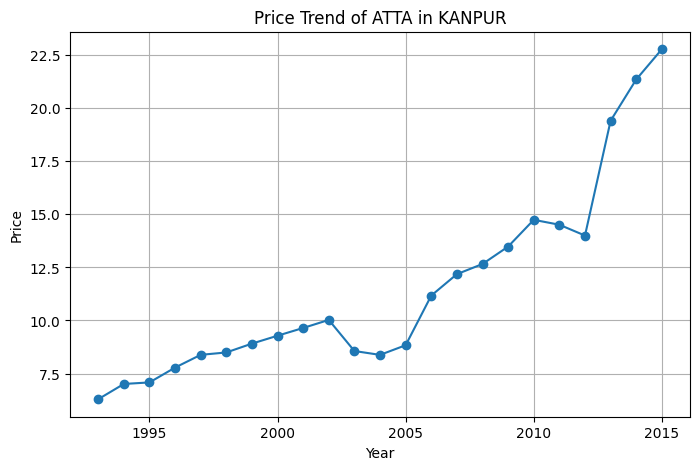

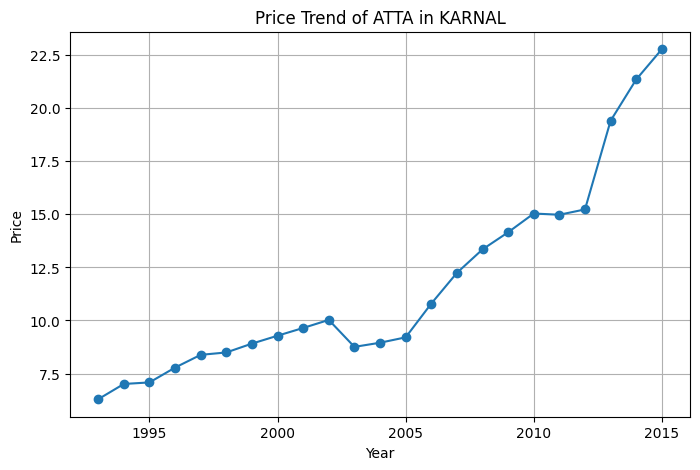

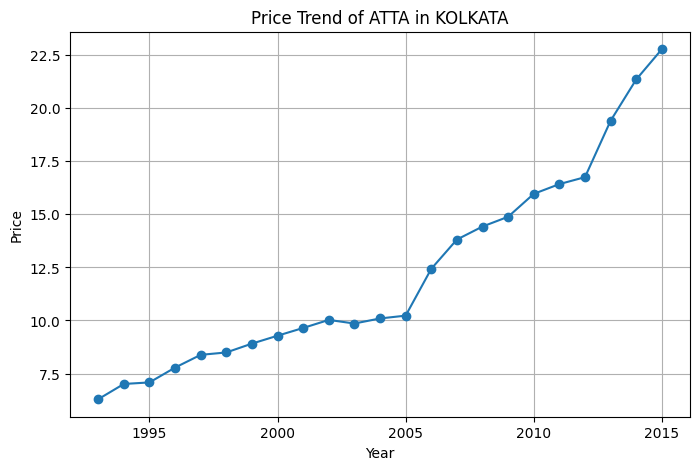

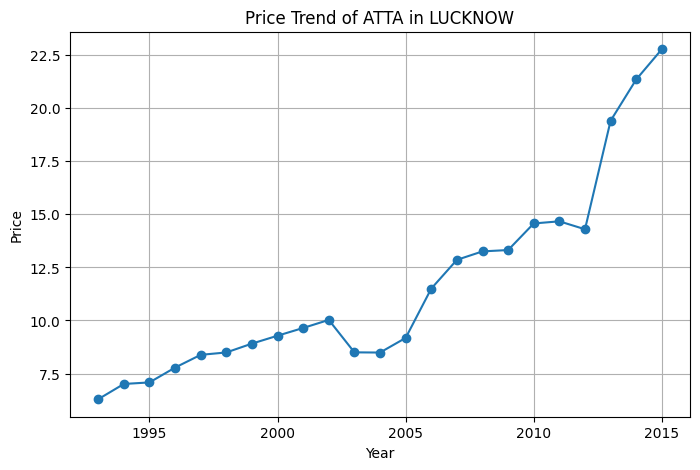

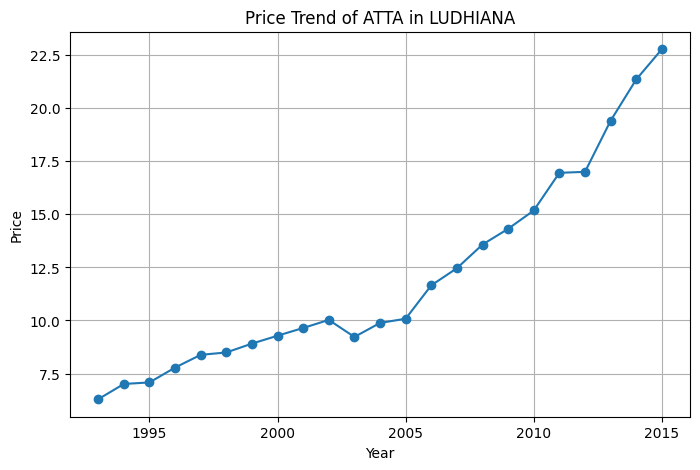

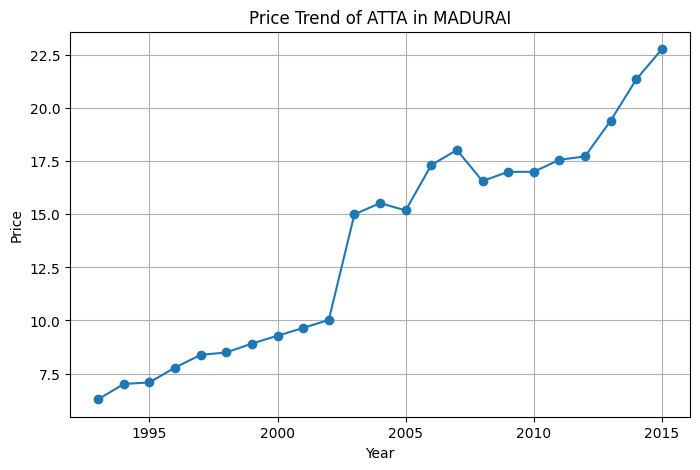

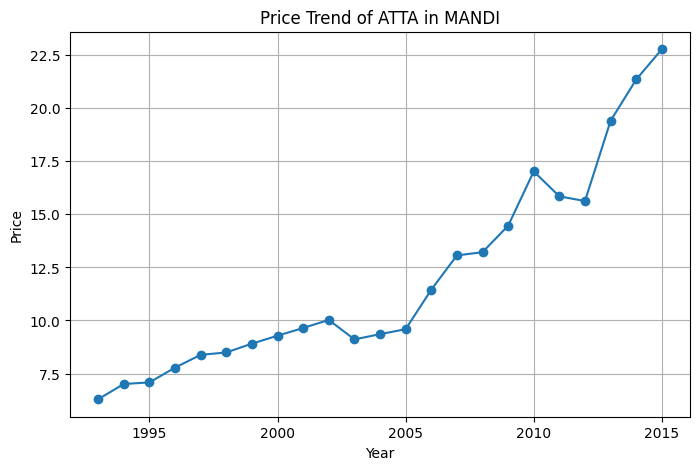

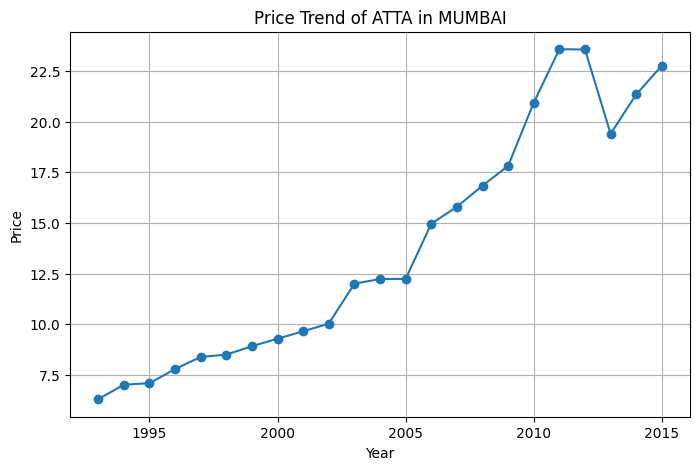

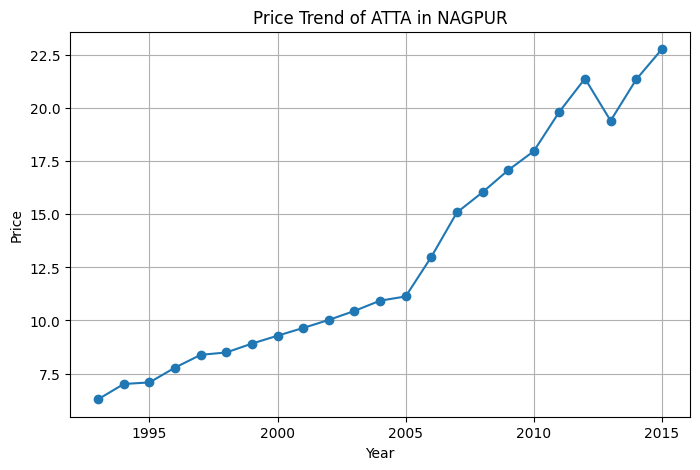

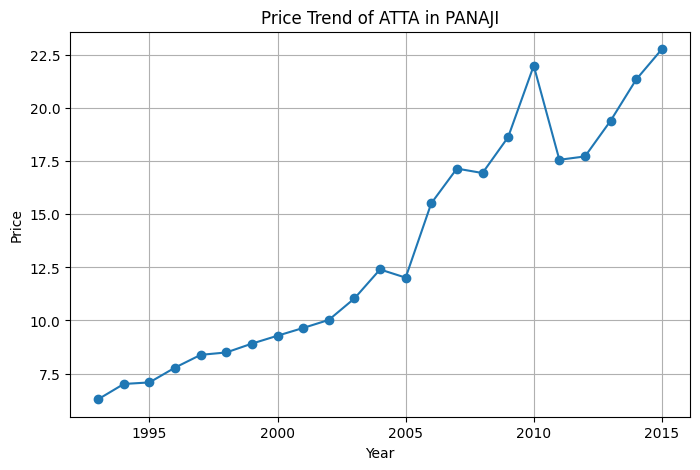

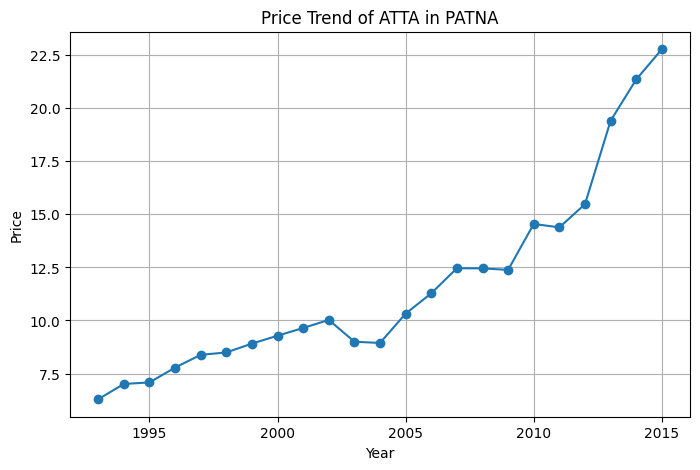

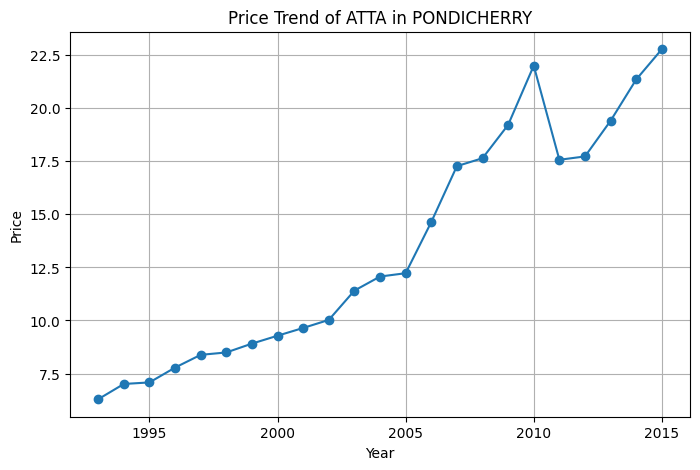

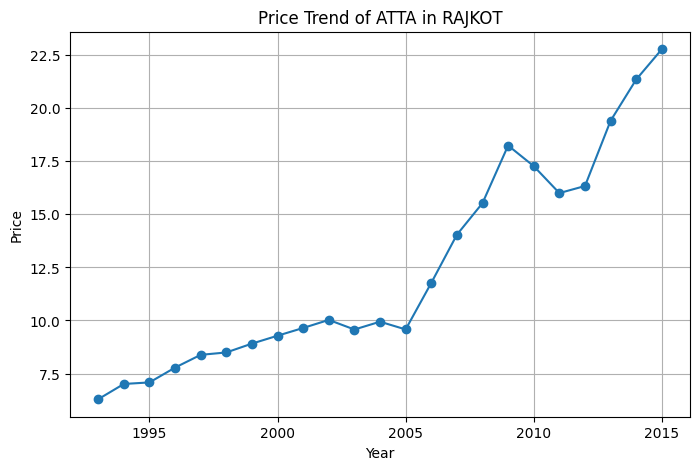

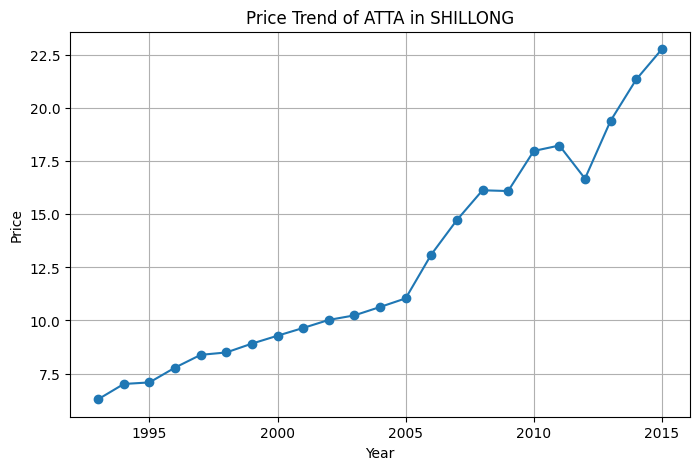

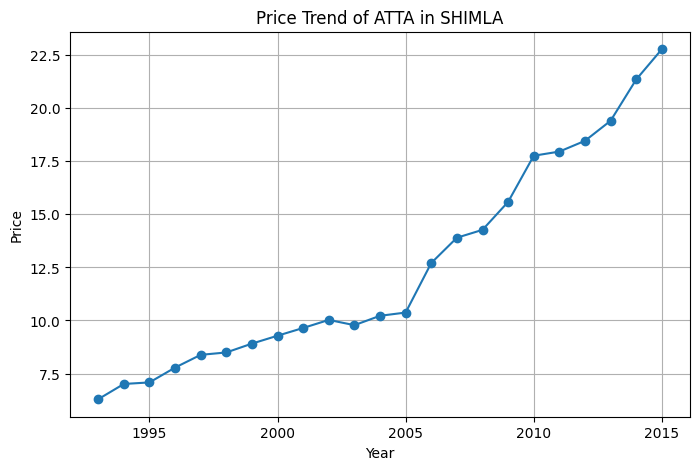

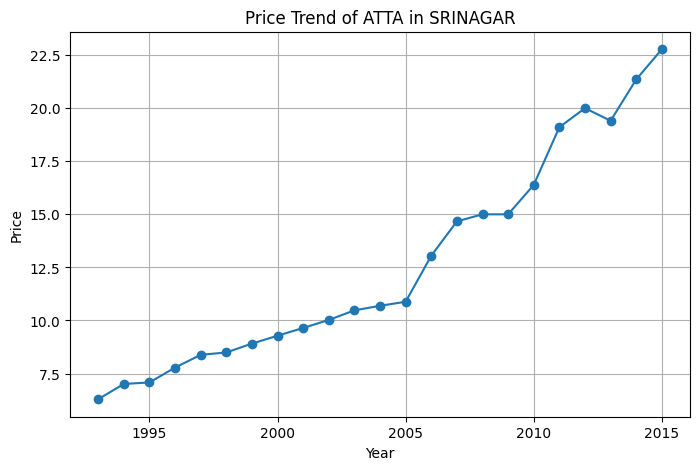

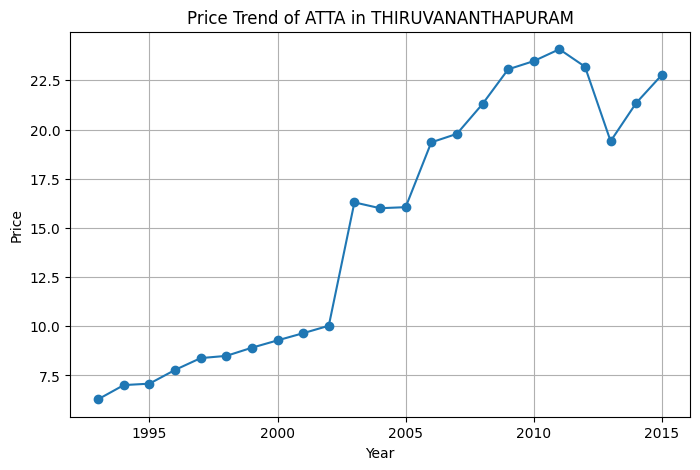

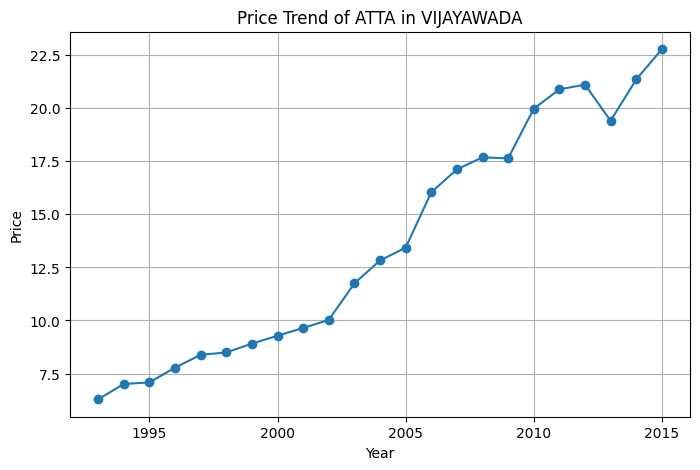

In [ ]:
# Filter for a specific commodity (e.g., 'ATTA')
commodity_to_plot = 'ATTA'
df_filtered = df_long[df_long['Commodity_Name'] == commodity_to_plot]

# Plotting separately for each Centre
for centre in df_filtered['Centre_Name'].unique():
    df_centre = df_filtered[df_filtered['Centre_Name'] == centre]

    plt.figure(figsize=(8, 5))
    plt.plot(df_centre['Year'], df_centre['Price'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Price Trend of {commodity_to_plot} in {centre}')
    plt.grid(True)
    plt.show()

<Figure size 1000x600 with 0 Axes>

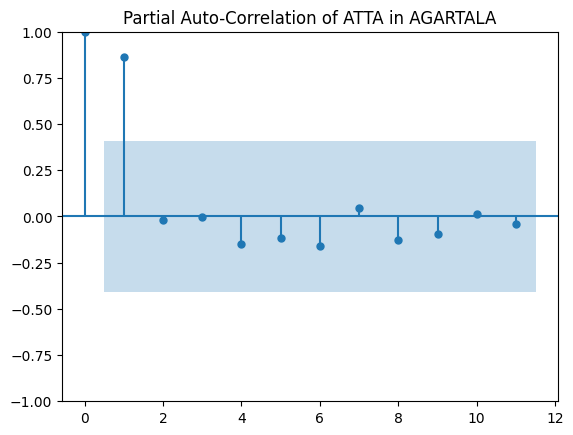

In [ ]:
# Filter for a specific centre and commodity (e.g., 'AGARTALA' and 'ATTA')
centre_to_plot = 'AGARTALA'
commodity_to_plot = 'ATTA'
df_filtered = df_long[(df_long['Centre_Name'] == centre_to_plot) & (df_long['Commodity_Name'] == commodity_to_plot)]

# Sort by Year to ensure correct order
df_filtered = df_filtered.sort_values(by='Year')

# Plot Partial Auto-Correlation (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(df_filtered['Price'], lags=11, method='ywmle', title=f'Partial Auto-Correlation of {commodity_to_plot} in {centre_to_plot}')
plt.show()

In [ ]:
df_grouped.head()

Year,Centre_Name,Commodity_Name,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AGARTALA,ATTA,6.292407,7.011038,7.083431,7.78228,8.382464,8.494851,8.910994,9.283253,...,12.817308,15.622642,16.424528,16.384615,19.333333,19.478261,20.052632,19.406213,21.350715,22.774808
1,AHMEDABAD,ATTA,6.292407,7.011038,7.083431,7.78228,8.382464,8.494851,8.910994,9.283253,...,11.586538,13.548077,13.716981,14.134615,16.648148,14.962264,15.962963,19.406213,21.350715,22.774808
2,AIZAWL,ATTA,6.292407,7.011038,7.083431,7.78228,8.382464,8.494851,8.910994,9.283253,...,14.000000,14.865385,14.698113,14.000000,14.333333,16.156250,17.000000,19.406213,21.350715,22.774808
3,AMRITSAR,ATTA,6.292407,7.011038,7.083431,7.78228,8.382464,8.494851,8.910994,9.283253,...,11.067308,12.221154,13.000000,13.519231,14.840000,13.666667,15.521739,19.406213,21.350715,22.774808
4,BANGALORE,ATTA,6.292407,7.011038,7.083431,7.78228,8.382464,8.494851,8.910994,9.283253,...,13.884615,16.615385,17.127273,18.288462,19.509804,19.440000,19.000000,19.406213,21.350715,22.774808


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
# Filter the data for a specific commodity and centre if needed
centre_to_plot = 'VIJAYWADA'
commodity_to_plot = 'Cabbage'

df_filtered = df_grouped[(df_grouped['Centre_Name'] == centre_to_plot) & (df_grouped['Commodity_Name'] == commodity_to_plot)]

In [ ]:
df_filtered

Year,Centre_Name,Commodity_Name,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
127,VIJAYWADA,Cabbage,6.225856,6.936887,7.726539,8.488837,9.143513,10.537643,11.053858,11.526442,...,14.992977,16.013006,17.47191,13.652467,11.779006,8.742739,12.077551,14.306533,8.307692,16.575395


In [ ]:
# Transpose to convert to a time series format
df_ts = df_filtered.drop(columns=['Centre_Name', 'Commodity_Name']).T
df_ts.columns = ['Price']  # Rename the column to 'Price'

In [ ]:
df_ts

,Price
Year,
1993,6.225856
1994,6.936887
1995,7.726539
1996,8.488837
1997,9.143513
1998,10.537643
1999,11.053858
2000,11.526442
2001,11.979258


In [ ]:
# Fit the AR model
ar_model = AutoReg(df_ts['Price'], lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


In [ ]:
ar_model

In [ ]:
# Print model summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Price   No. Observations:                   23
Model:                     AutoReg(1)   Log Likelihood                 -49.795
Method:               Conditional MLE   S.D. of innovations              2.327
Date:                Thu, 12 Sep 2024   AIC                            105.590
Time:                        16:35:01   BIC                            108.863
Sample:                    01-01-1970   HQIC                           106.361
                         - 01-01-1970                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3048      2.002      2.650      0.008       1.381       9.229
Price.L1       0.5815      0.168      3.463      0.001       0.252       0.911
                                    Roots           

In [ ]:
# Predict future values
pred = ar_model.predict(start=len(df_ts), end=len(df_ts) + 8)  # Predict the next 10 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
len(df_ts)

23

In [ ]:
len(df_ts) + 8

31

In [ ]:
pred

,0
1970-01-01 00:00:00.000002016,14.943510
1970-01-01 00:00:00.000002017,13.994553
1970-01-01 00:00:00.000002018,13.442726
1970-01-01 00:00:00.000002019,13.121833
1970-01-01 00:00:00.000002020,12.935232
1970-01-01 00:00:00.000002021,12.826721
1970-01-01 00:00:00.000002022,12.763621
1970-01-01 00:00:00.000002023,12.726927
1970-01-01 00:00:00.000002024,12.705590
